file_list: ['차승원.jpg', '차두리.jpeg', '이승철.jpeg', '서강준.jpg', '차범근.jpeg', '이동국.jpeg', '켄 정.jpeg', '박진영.jpg', '장동건.jpeg', '하현우.jpg', '잭 스페이더.jpeg', '박재범.jpg', '윤경신.jpg', '제이콥 배털론.jpg', '박명수.jpg', '마크 러팔로.jpeg', '성시경.jpg', '크리스탈.jpg', '이우용2.png', '박휘순.jpg', '노홍철.jpeg', '아이유.jpg', '최준석.jpg', '홍구.jpg', '이용진.jpg', '류승룡.jpeg', '제이크 질렌할.jpeg', '지호.jpg', '숀 코네리.jpg', '슈가.jpg', '박나래.jpeg', '크리스 에반스.jpg', '이영하.jpg', '이종석.jpeg', '온앤오프라운.jpg', '송중기.jpeg', '한효주.jpg', '첸.jpg', '김대중.jpg', '제프리 힌턴.jpg', '슬리피.jpg', '김종서.jpg', '김유정.jpg', '박성호.jpg', '마동석.jpeg', '서현진.jpg', '방시혁.jpeg', '이제훈.jpeg', '잇지예지.jpeg', '티모시 달튼.jpeg', '.ipynb_checkpoints', '진.jpg', '기성용.jpg', '주진모(올드).jpg', '사쿠라.jpg', '도지한.jpg', '박건우.png', '정국.jpg', '개리.jpg', '최양락.jpg', '김희철.jpg', '백윤식.png', '유해진.jpg', '주호민.jpeg', '류승범.jpg', '박희순.jpg', '브래들리 쿠퍼.jpg', '박찬호.jpg', '트와이스모모.jpeg', '배성재.jpg', '이경규.jpeg', '정형돈.jpg', '로저 무어.jpeg', '박정민.jpg', '김연우.jpeg', '김C.jpeg', '영알남.png', '비니.jpg', '공유.jpg', '박신양.png', '줄리엔강.png', 'b1a4진영.jpeg', '김남주.jpeg', 

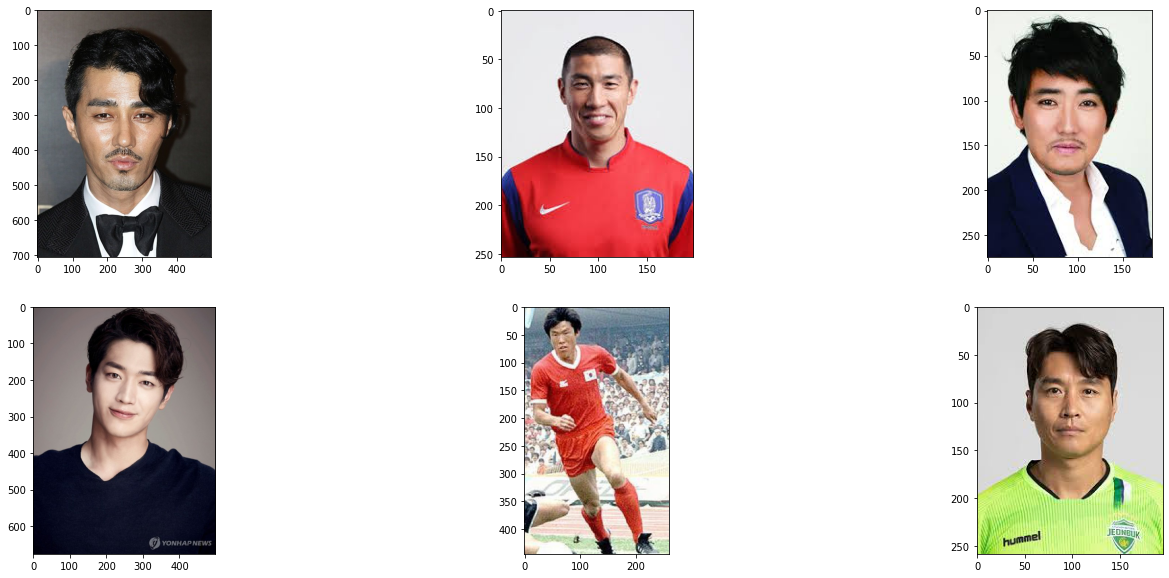

In [69]:
import os
import numpy as np
dir_path = os.getenv('HOME')+'/aiffel/FaceEmbedding'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

[(98, 758, 284, 572)]


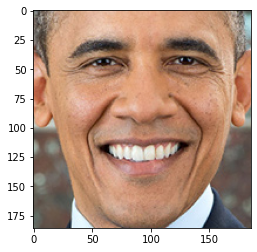

In [70]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.getenv('HOME')+'/aiffel/FaceEmbedding/obama.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

## 얼굴 부분만 crop 하는 함수 구현

In [71]:
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

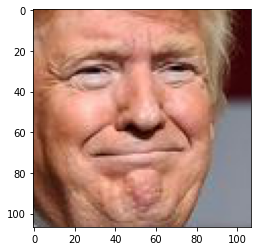

In [72]:
image_path = os.getenv('HOME')+'/aiffel/FaceEmbedding/trump.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

In [73]:
import os

dir_path = os.getenv('HOME')+'/aiffel/FaceEmbedding'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['차승원.jpg', '차두리.jpeg', '이승철.jpeg', '서강준.jpg', '차범근.jpeg', '이동국.jpeg', '켄 정.jpeg', '박진영.jpg', '장동건.jpeg', '하현우.jpg', '잭 스페이더.jpeg', '박재범.jpg', '윤경신.jpg', '제이콥 배털론.jpg', '박명수.jpg', '마크 러팔로.jpeg', '성시경.jpg', '크리스탈.jpg', '이우용2.png', '박휘순.jpg', '노홍철.jpeg', '아이유.jpg', '최준석.jpg', '홍구.jpg', '이용진.jpg', '류승룡.jpeg', '제이크 질렌할.jpeg', '지호.jpg', '숀 코네리.jpg', '슈가.jpg', '박나래.jpeg', '크리스 에반스.jpg', '이영하.jpg', '이종석.jpeg', '온앤오프라운.jpg', '송중기.jpeg', '한효주.jpg', '첸.jpg', '김대중.jpg', '제프리 힌턴.jpg', '슬리피.jpg', '김종서.jpg', '김유정.jpg', '박성호.jpg', '마동석.jpeg', '서현진.jpg', '방시혁.jpeg', '이제훈.jpeg', '잇지예지.jpeg', '티모시 달튼.jpeg', '.ipynb_checkpoints', '진.jpg', '기성용.jpg', '주진모(올드).jpg', '사쿠라.jpg', '도지한.jpg', '박건우.png', '정국.jpg', '개리.jpg', '최양락.jpg', '김희철.jpg', '백윤식.png', '유해진.jpg', '주호민.jpeg', '류승범.jpg', '박희순.jpg', '브래들리 쿠퍼.jpg', '박찬호.jpg', '트와이스모모.jpeg', '배성재.jpg', '이경규.jpeg', '정형돈.jpg', '로저 무어.jpeg', '박정민.jpg', '김연우.jpeg', '김C.jpeg', '영알남.png', '비니.jpg', '공유.jpg', '박신양.png', '줄리엔강.png', 'b1a4진영.jpeg', '김남주.jpeg', 

## 얼굴 영역 추출 후 얼굴 임베딩 벡터 구하기

In [74]:
image_file = os.path.join(dir_path, 'obama.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.08126248,  0.11014761, -0.01082448, -0.05268792,  0.01033717,
        -0.00813808, -0.07251769, -0.0922646 ,  0.19304723, -0.09246384,
         0.23908533,  0.06770287, -0.22123125, -0.14119367,  0.05562152,
         0.13705511, -0.17924425, -0.07232306, -0.11183281, -0.11370818,
         0.03956435, -0.01019115,  0.0942178 ,  0.04493114, -0.12757549,
        -0.34449592, -0.05374938, -0.17703305,  0.00868226, -0.09721592,
        -0.09817187,  0.00278232, -0.17721367, -0.12789807,  0.03489833,
        -0.01991234, -0.00838933, -0.00132862,  0.18308581,  0.02447568,
        -0.1237656 ,  0.09957044,  0.02323568,  0.22983313,  0.2838524 ,
         0.06655717, -0.00558912, -0.09833544,  0.10058986, -0.23476946,
         0.06006292,  0.1341591 ,  0.08373027,  0.03900504,  0.10194533,
        -0.19337648,  0.01717628,  0.08978969, -0.16005114,  0.01892098,
         0.03082444, -0.06051281, -0.04526773,  0.04633342,  0.20678686,
         0.10299795, -0.12437531, -0.0490516 ,  0.1

* 128차원의 벡터로 생성됨

## 임베딩된 이미지를 딕셔너리에 추가

In [77]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        try:         
            img_path = os.path.join(dir_path, file)
            face = get_cropped_face(img_path)
            embedding = get_face_embedding(face)
            if len(embedding) > 0:  
            # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
            # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
                
        except:
            continue


    return embedding_dict

In [91]:
embedding_dict = get_face_embedding_dict(dir_path)

In [92]:
embedding_dict

{'차승원': array([-1.76199928e-01,  1.38627023e-01,  9.17742699e-02,  2.06732042e-02,
        -9.28248093e-02,  1.92910470e-02, -2.12832820e-02, -9.10144076e-02,
         1.69319272e-01, -8.31044316e-02,  1.84872314e-01, -5.38875647e-02,
        -2.13404283e-01, -7.01894425e-03, -7.83728361e-02,  1.36290684e-01,
        -1.31775975e-01, -1.27593294e-01, -2.58462988e-02,  2.08888650e-02,
         9.31046382e-02,  3.83944474e-02, -2.13115904e-02,  3.08301058e-02,
        -1.40931562e-01, -3.22686791e-01, -4.86604683e-02, -2.68907547e-02,
        -8.06841701e-02, -1.20126985e-01, -5.03977798e-02,  8.89404044e-02,
        -2.04677865e-01, -3.33773345e-02, -6.19721599e-04,  1.26277745e-01,
         2.80273370e-02,  3.69810574e-02,  1.05193414e-01,  2.86079645e-02,
        -2.10275099e-01,  4.80549373e-02,  6.35897070e-02,  3.19999576e-01,
         1.77597672e-01,  2.66965013e-02, -4.32315692e-02, -1.91378847e-01,
         6.70857504e-02, -1.71215892e-01,  7.78468698e-02,  1.63070425e-01,
     

## 유클리드 거리

In [80]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('이우용1', '이우용2')

0.34778759723029296

In [85]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('이우용1')
sort_key_func
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

<function __main__.get_sort_key_func.<locals>.get_distance_from_name1(name2)>

In [86]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('이우용1',
  array([-0.03835717,  0.10248418,  0.03886373, -0.04301387, -0.1240397 ,
         -0.00730043, -0.1111    , -0.10247099,  0.07292644, -0.10712546,
          0.203609  , -0.08044116, -0.23434496, -0.06581686, -0.07137039,
          0.19294186, -0.14843825, -0.14269838, -0.02195583, -0.07050719,
          0.08448771,  0.05846227,  0.06078986,  0.01699414, -0.08083105,
         -0.32465917, -0.07212468, -0.07464523,  0.01462105, -0.04391964,
         -0.10447934,  0.03782699, -0.1843442 , -0.03597993,  0.09310737,
          0.1286061 ,  0.02055966, -0.08392451,  0.16778041,  0.0253239 ,
         -0.17603058,  0.03596662,  0.07202326,  0.21872906,  0.16522561,
          0.01834406,  0.04382637, -0.1727003 ,  0.12183329, -0.12087528,
          0.10715027,  0.1624977 ,  0.10347329,  0.02733547, -0.00910582,
         -0.12400666,  0.04052584,  0.12792806, -0.09390434,  0.02337833,
          0.13744447, -0.02823721, -0.05536129, -0.09779853,  0.18875229,
          0.03969547, -0.095

In [89]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [90]:
# obama와 가장 닮은 사람은 누굴까요?
get_nearest_face('이우용1')

순위 1 : 이름(이우용2), 거리(0.34778759723029296)
순위 2 : 이름(이용진), 거리(0.3658815205484611)
순위 3 : 이름(하현우), 거리(0.37347690873443246)
순위 4 : 이름(윤균상), 거리(0.3927384987812998)
순위 5 : 이름(수호), 거리(0.40166559932262835)
